In [12]:
import math
import pickle
import gzip
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

from math import exp
import kagglehub
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [13]:
# This cell sets up the MNIST dataset 


# Download latest version
path = kagglehub.dataset_download("aadeshkoirala/mnist-784")

class MNIST_import:
    """
    sets up MNIST dataset from OpenML 
    """
    def __init__(self):
        
        df = pd.read_csv(f"{path}/mnist_784.csv")
        
        # Create arrays for the features and the response variable
        # store for use later 
        y = df['class'].values
        X = df.drop('class', axis=1).values
         
        # Convert the labels to numeric labels
        y = np.array(pd.to_numeric(y))
        
        # create training and validation sets 
        self.train_x, self.train_y = X[:5000,:], y[:5000]
        self.val_x, self.val_y = X[5000:6000,:], y[5000:6000]
        
data = MNIST_import()

In [14]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh = neigh.fit(data.train_x, data.train_y)
val_yhat = neigh.predict(data.val_x)


In [15]:
sklearn.metrics.confusion_matrix(data.val_y, val_yhat, labels=None, sample_weight=None, normalize=None)

array([[112,   0,   0,   0,   0,   0,   1,   0,   0,   0],
       [  0, 106,   0,   0,   0,   0,   0,   1,   0,   1],
       [  2,   2,  85,   2,   0,   0,   0,   2,   0,   0],
       [  1,   2,   0, 110,   0,   2,   0,   0,   0,   0],
       [  0,   3,   0,   0,  81,   0,   0,   0,   0,   4],
       [  0,   2,   0,   2,   3,  73,   0,   0,   0,   0],
       [  0,   0,   0,   0,   1,   2, 104,   0,   0,   0],
       [  1,   2,   0,   0,   0,   0,   0,  93,   0,   5],
       [  1,   1,   2,   1,   1,   0,   2,   1,  80,   0],
       [  1,   0,   0,   2,   2,   0,   0,   1,   0, 100]])

K = 1; Accuracy: 0.942
K = 2; Accuracy: 0.935
K = 3; Accuracy: 0.944
K = 4; Accuracy: 0.937
K = 5; Accuracy: 0.939
K = 6; Accuracy: 0.931
K = 7; Accuracy: 0.928
K = 8; Accuracy: 0.929
K = 9; Accuracy: 0.927
K = 10; Accuracy: 0.93
K = 11; Accuracy: 0.926
K = 12; Accuracy: 0.926
K = 13; Accuracy: 0.922
K = 14; Accuracy: 0.92
K = 15; Accuracy: 0.917
K = 16; Accuracy: 0.915
K = 17; Accuracy: 0.913
K = 18; Accuracy: 0.916
K = 19; Accuracy: 0.917
K = 20; Accuracy: 0.917
K = 21; Accuracy: 0.913
K = 22; Accuracy: 0.913
K = 23; Accuracy: 0.913
K = 24; Accuracy: 0.911
K = 25; Accuracy: 0.911
K = 26; Accuracy: 0.911
K = 27; Accuracy: 0.908
K = 28; Accuracy: 0.908
K = 29; Accuracy: 0.906
K = 30; Accuracy: 0.906


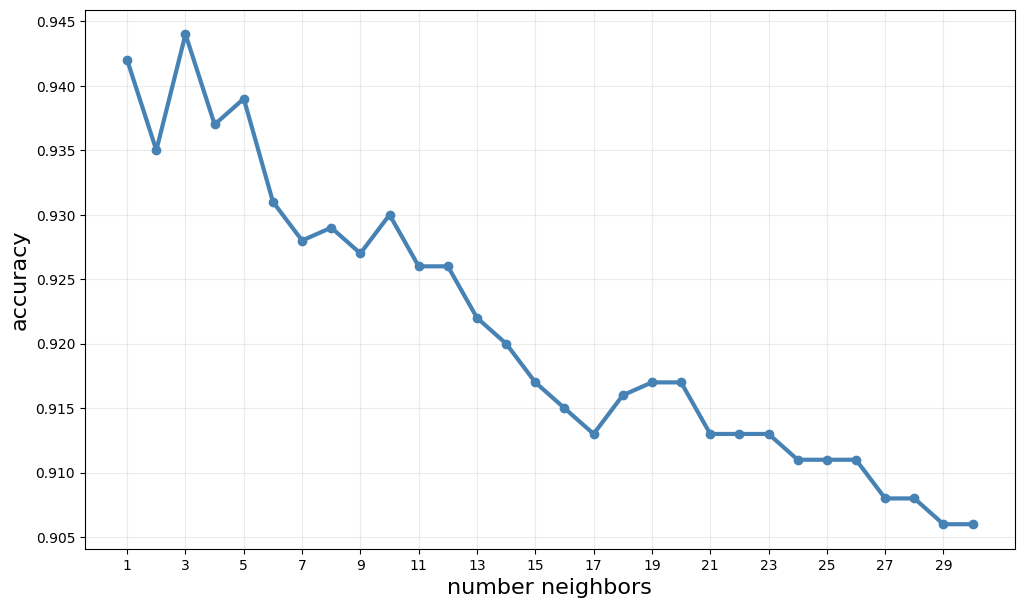

In [16]:
# Accuracy plot
acc = []
wacc = []
allks = range(1,31)
for k in allks:
    # train the k-Nearest Neighbor classifier with the current value of `k`
    model = KNeighborsClassifier(n_neighbors=k).fit(data.train_x, data.train_y)
    # evaluate the model and update the accuracies list
    val_yhat = model.predict(data.val_x)
    accuracy = accuracy_score(data.val_y, val_yhat)
    acc.append(accuracy)
    print("K = "+str(k)+"; Accuracy: "+str(accuracy))


# create plot   
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,7))
ax.plot(allks, acc, marker="o", color="steelblue", lw=3, label="unweighted")
ax.set_xlabel("number neighbors", fontsize=16)
ax.set_ylabel("accuracy", fontsize=16)
plt.xticks(range(1,31,2))
ax.grid(alpha=0.25)